In [69]:
# 假设决赛的match_id为"2023-wimbledon-1701"
match_id = "2023-wimbledon-1701"

In [70]:
import pandas as pd

# 创建示例数据
data = {'momentum_difference': [1, 2, -1, -2, 3, 4, 5, 1, 2, -1, -2,2,4,5],
        'game_victor': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2,0,0,1]}
df = pd.DataFrame(data)

# 找到 game 周期的起始位置
game_starts = df[df['game_victor'].isin([1, 2])].index
game_starts = [-1] + game_starts.tolist()  # 添加起始位置为-1
print(game_starts)
# 计算每个 game 周期内的平均 momentum_difference
for i in range(len(game_starts) - 1):
    start = game_starts[i] + 1
    end = game_starts[i + 1] + 1 if i + 1 < len(game_starts) else len(df)
    length = end - start
    print(length)

    # 计算当前 game 周期的平均 momentum_difference
    average_momentum = df.loc[start:end - 1, 'momentum_difference'].sum() / length
    # 填充当前 game 周期的 momentum_accumulated 列
    df.loc[start:end - 1, 'momentum_accumulated'] = average_momentum

print(df[['momentum_difference', 'game_victor', 'momentum_accumulated']])


[-1, 3, 10, 13]
4
7
3
    momentum_difference  game_victor  momentum_accumulated
0                     1            0              0.000000
1                     2            0              0.000000
2                    -1            0              0.000000
3                    -2            1              0.000000
4                     3            0              1.714286
5                     4            0              1.714286
6                     5            0              1.714286
7                     1            0              1.714286
8                     2            0              1.714286
9                    -1            0              1.714286
10                   -2            2              1.714286
11                    2            0              3.666667
12                    4            0              3.666667
13                    5            1              3.666667


In [79]:
import pandas as pd
import numpy as np
# 读取数据
match_momentum_data = pd.read_csv(f'{match_id}match_momentum.csv')

# 提取关键列
# 找到 game 周期的起始位置
game_starts = match_momentum_data[match_momentum_data['game_victor'].isin([1, 2])].index
game_starts = [-1] + game_starts.tolist()  # 添加起始位置为-1
# print(game_starts)


# 计算每个 game 周期内的平均 momentum_difference
for i in range(len(game_starts) - 1):
    start = game_starts[i] + 1
    end = game_starts[i + 1] + 1 if i + 1 < len(game_starts) else len(match_momentum_data)
    length = end - start
    # print(length)

    # 计算当前 game 周期的平均 momentum_difference
    average_momentum = match_momentum_data.loc[start:end - 1, 'momentum_difference'].sum() / length
    # 填充当前 game 周期的 momentum_average 列
    match_momentum_data.loc[start:end - 1, 'momentum_average'] = average_momentum

# print(match_momentum_data[['momentum_difference', 'game_victor', 'momentum_average']])

momentum_average = match_momentum_data['momentum_average']
game_victor = match_momentum_data['game_victor']

# 统计势头累计值与比赛结果的关系，当 game_victor 不为 0 且 momentum_average 不为空时考虑
momentum_relation_with_game_victor = ((momentum_average < 0) & (game_victor == 2) | (momentum_average > 0) & (game_victor == 1)) & (game_victor != 0)

# 将 game_victor 为 0 的行的 momentum_relation_with_game_victor 设置为 NaN
momentum_relation_with_game_victor.loc[game_victor == 0] = np.nan

# print(momentum_relation_with_game_victor)

# 输出结果
print("单个game周期内势头平均值与比赛结果是否有关：")
print(match_momentum_data.loc[momentum_relation_with_game_victor & (game_victor != 0), ['game_victor', 'momentum_average']])

# 统计 True 和 False 的数量，但仅考虑 game_victor 不为 0 的情况
count_true = momentum_relation_with_game_victor[game_victor != 0].sum()
count_false = len(momentum_relation_with_game_victor[game_victor != 0]) - count_true

# 计算比例
ratio_true = count_true / len(momentum_relation_with_game_victor[game_victor != 0])
ratio_false = count_false / len(momentum_relation_with_game_victor[game_victor != 0])

# 打印结果
print(f'True 的比例: {ratio_true:.2%}')
print(f'False 的比例: {ratio_false:.2%}')

# 将结果保存为 CSV 文件
# match_momentum_data.loc[momentum_relation_with_game_victor & (game_victor != 0), ['game_victor', 'momentum_accumulated']].to_csv('momentum_relation_with_game_victor.csv', index=False)

match_momentum_data['momentum_relate_victor'] = momentum_relation_with_game_victor


# 保存数据
# First, let's create a subset of the DataFrame with the columns we want to save
subset_match_data = match_momentum_data[['match_id', 'player1', 'player2', 'elapsed_time', 'p1_momentum_combined', 'p2_momentum_combined', 'momentum_difference', 'game_victor', 'point_victor', 'momentum_average', 'momentum_relate_victor']]

# Now, we'll save this subset to a new CSV file
subset_match_data.to_csv(f'{match_id}momentum_relation_with_game_victor.csv', index=False)


势头累计值与比赛结果是否有关：
     game_victor  momentum_average
9              2         -3.484983
15             2         -6.114990
21             2         -4.158860
29             2         -4.746096
34             2         -6.326588
44             2         -1.414482
49             1          5.561986
59             1          3.126336
67             2         -0.450617
75             2         -6.600198
85             1          2.749814
95             1          6.206851
100            2         -2.761523
105            1          3.953343
113            2         -2.547677
118            1          1.916769
124            2         -1.728358
138            1          3.260924
146            1          4.734929
152            1          6.037848
158            2         -0.514402
166            1          0.986745
198            1          1.676869
203            1         12.025939
208            1          5.361020
214            1          4.711022
222            2         -0.698243
234 

In [88]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
result_columns = ['game_victor', 'momentum_average']

result_data = match_momentum_data.loc[momentum_relation_with_game_victor & (game_victor != 0), result_columns]
# print(result_data)
# 计算皮尔逊相关系数
pearson_corr, pearson_p_value = pearsonr(result_data['game_victor'], result_data['momentum_average'])

# 计算斯皮尔曼秩相关系数
spearman_corr, spearman_p_value = spearmanr(result_data['game_victor'], result_data['momentum_average'])

# 打印结果
print(f"Pearson Correlation: {pearson_corr:.4f}, p-value: {pearson_p_value:.4f}")
print(f"Spearman Correlation: {spearman_corr:.4f}, p-value: {spearman_p_value:.4f}")

Pearson Correlation: -0.8219, p-value: 0.0000
Spearman Correlation: -0.8653, p-value: 0.0000


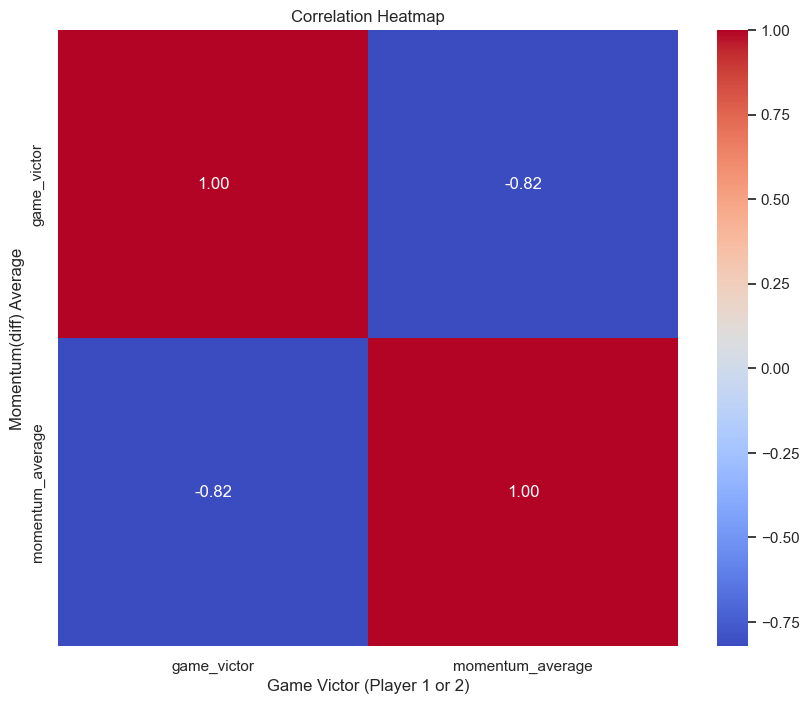

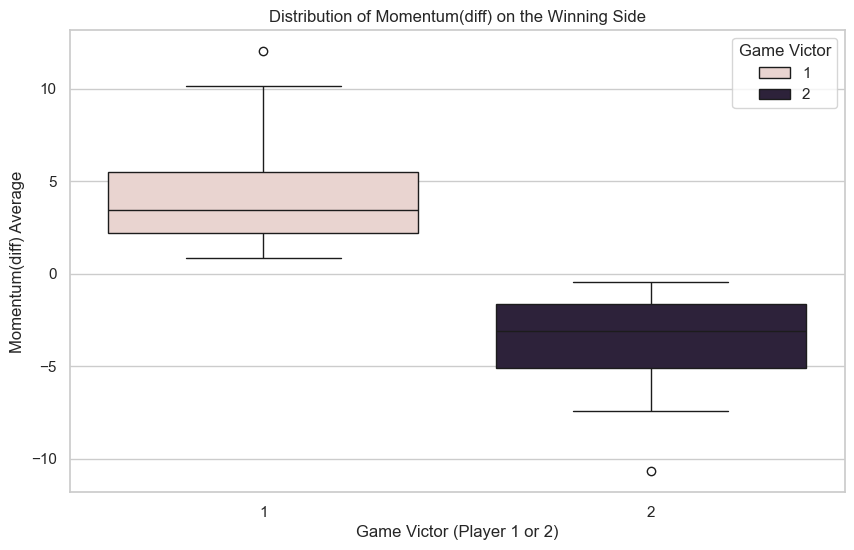

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置图形的大小
plt.figure(figsize=(10, 8))

# 绘制相关性热图
correlation_matrix = result_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# 设置图形的标题和标签
plt.title('Correlation Heatmap')
plt.xlabel('Game Victor (Player 1 or 2)')
plt.ylabel('Momentum(diff) Average')

# 显示图形
plt.show()


# 修改颜色和风格
sns.set(style="whitegrid", palette="pastel")

# 创建箱型图
plt.figure(figsize=(10, 6))
sns.boxplot(x='game_victor', y='momentum_average', data=result_data, hue='game_victor', dodge=False)

# 添加标题和标签
plt.title('Distribution of Momentum(diff) on the Winning Side')
plt.xlabel('Game Victor (Player 1 or 2)')
plt.ylabel('Momentum(diff) Average')

# 添加图例
plt.legend(title='Game Victor', loc='upper right')

# 显示图形
plt.show()


In [68]:
# import pandas as pd
# # 读取数据
# match_momentum_data = pd.read_csv(f'{match_id}match_momentum.csv')

# # 提取关键列
# # 找到 game 周期的起始位置
# game_starts = match_momentum_data[match_momentum_data['game_victor'].isin([1, 2])].index
# # print(game_starts)
# # 计算每个 game 周期内的平均 momentum_difference
# match_momentum_data['momentum_accumulated'] = match_momentum_data.groupby(match_momentum_data['game_victor'].eq(0).cumsum())['momentum_difference'].transform(lambda x: x.expanding().mean())
# # print(match_momentum_data['momentum_accumulated'])
# momentum_accumulated = match_momentum_data['momentum_accumulated']
# game_victor = match_momentum_data['game_victor']
# # 统计势头累计值与比赛结果的关系，当 game_victor 不为 0 且 momentum_accumulated 不为空时考虑
# momentum_relation_with_game_victor = ((momentum_accumulated < 0) & (game_victor == 2) | (momentum_accumulated > 0) & (game_victor == 1)) & (game_victor != 0)
# # print(momentum_relation_with_game_victor)

# # 输出结果
# print("势头累计值与比赛结果是否有关：")
# print(match_momentum_data.loc[momentum_relation_with_game_victor & (game_victor != 0), ['game_victor', 'momentum_accumulated']])

# # 统计 True 和 False 的数量，但仅考虑 game_victor 不为 0 的情况
# count_true = momentum_relation_with_game_victor[game_victor != 0].sum()
# count_false = len(momentum_relation_with_game_victor[game_victor != 0]) - count_true

# # 计算比例
# ratio_true = count_true / len(momentum_relation_with_game_victor[game_victor != 0])
# ratio_false = count_false / len(momentum_relation_with_game_victor[game_victor != 0])

# # 打印结果
# print(f'True 的比例: {ratio_true:.2%}')
# print(f'False 的比例: {ratio_false:.2%}')

# # 将结果保存为 CSV 文件
# # match_momentum_data.loc[momentum_relation_with_game_victor & (game_victor != 0), ['game_victor', 'momentum_accumulated']].to_csv('momentum_relation_with_game_victor.csv', index=False)

# match_momentum_data['momentum_relate_victor'] = momentum_relation_with_game_victor


# # 保存数据
# # First, let's create a subset of the DataFrame with the columns we want to save
# subset_match_data = match_momentum_data[['match_id', 'player1', 'player2', 'elapsed_time', 'p1_momentum_combined', 'p2_momentum_combined', 'momentum_difference', 'game_victor', 'point_victor', 'momentum_accumulated', 'momentum_relate_victor']]

# # Now, we'll save this subset to a new CSV file
# subset_match_data.to_csv(f'{match_id}momentum_relation_with_game_victor.csv', index=False)


In [80]:
import pandas as pd
import numpy as np

# 提取关键列
# 找到 set 周期的起始位置
set_starts = match_momentum_data[match_momentum_data['set_victor'].isin([1, 2])].index
set_starts = [-1] + set_starts.tolist()  # 添加起始位置为-1
# print(set_starts)

# 计算每个 set 周期内的平均 momentum_difference
for i in range(len(set_starts) - 1):
    start = set_starts[i] + 1
    end = set_starts[i + 1] + 1 if i + 1 < len(set_starts) else len(match_momentum_data)
    length = end - start
    # print(length)

    # 计算当前 set 周期的平均 momentum_difference
    average_momentum = match_momentum_data.loc[start:end - 1, 'momentum_difference'].sum() / length
    # 填充当前 set 周期的 momentum_average_set 列
    match_momentum_data.loc[start:end - 1, 'momentum_average_set'] = average_momentum

# print(match_momentum_data[['momentum_difference', 'game_victor', 'momentum_average_set']])

momentum_average_set = match_momentum_data['momentum_average_set']
set_victor = match_momentum_data['set_victor']
# 统计势头累计值与比赛结果的关系，当 set_victor 不为 0 且 momentum_average 不为空时考虑
momentum_relation_with_set_victor = ((momentum_average_set < 0) & (set_victor == 2) | (momentum_average_set > 0) & (set_victor == 1)) & (set_victor != 0)

# 将 set_victor 为 0 的行的 momentum_relation_with_set_victor 设置为 NaN
momentum_relation_with_set_victor.loc[set_victor == 0] = np.nan

# 输出结果
print("单个set周期内势头平均值与比赛结果是否有关：")
print(match_momentum_data.loc[momentum_relation_with_set_victor & (set_victor != 0), ['set_victor', 'momentum_average_set']])

# 统计 True 和 False 的数量，但仅考虑 game_victor 不为 0 的情况
count_true = momentum_relation_with_set_victor[set_victor != 0].sum()
count_false = len(momentum_relation_with_set_victor[set_victor != 0]) - count_true

# 计算比例
ratio_true = count_true / len(momentum_relation_with_set_victor[set_victor != 0])
ratio_false = count_false / len(momentum_relation_with_set_victor[set_victor != 0])

# 打印结果
print(f'True 的比例: {ratio_true:.2%}')
print(f'False 的比例: {ratio_false:.2%}')



单个set周期内势头平均值与比赛结果是否有关：
     set_victor  momentum_average_set
44            2             -3.911503
138           1              0.961192
208           1              3.135838
272           2             -1.512883
333           1              2.294573
True 的比例: 100.00%
False 的比例: 0.00%


In [100]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
result_columns_set = ['set_victor', 'momentum_average_set']

result_data_set = match_momentum_data.loc[momentum_relation_with_set_victor & (set_victor != 0), result_columns_set]
# print(result_data_set)
# 计算皮尔逊相关系数
pearson_corr, pearson_p_value = pearsonr(result_data_set['set_victor'], result_data_set['momentum_average_set'])

# 计算斯皮尔曼秩相关系数
spearman_corr, spearman_p_value = spearmanr(result_data_set['set_victor'], result_data_set['momentum_average_set'])

# 打印结果
print(f"Pearson Correlation: {pearson_corr:.4f}, p-value: {pearson_p_value:.4f}")
print(f"Spearman Correlation: {spearman_corr:.4f}, p-value: {spearman_p_value:.4f}")

Pearson Correlation: -0.9176, p-value: 0.0280
Spearman Correlation: -0.8660, p-value: 0.0577


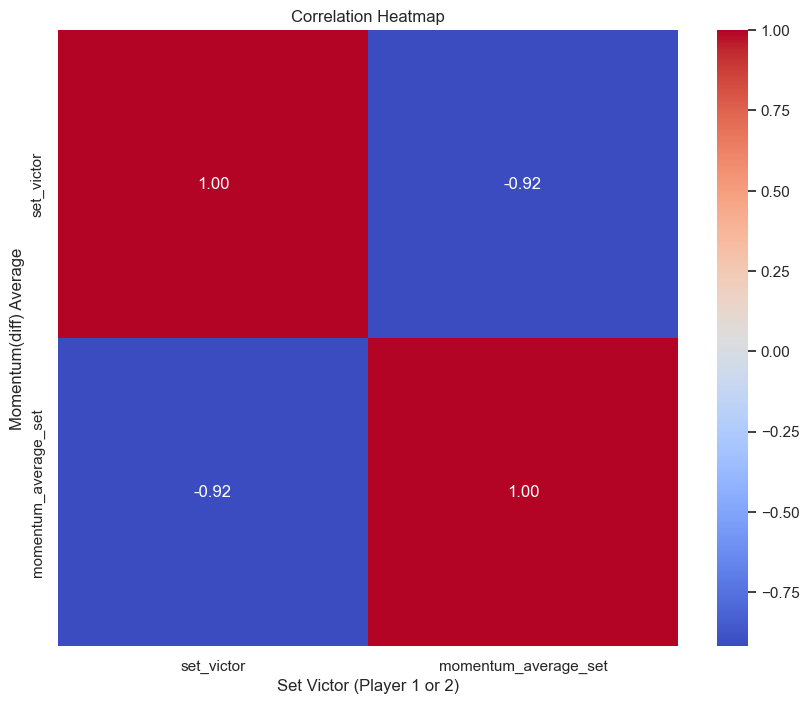

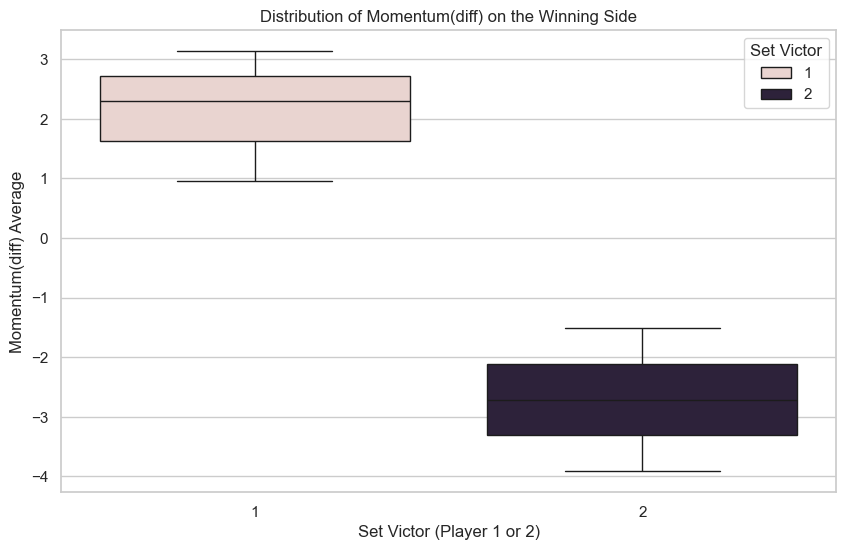

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置图形的大小
plt.figure(figsize=(10, 8))

# 绘制相关性热图
correlation_matrix_set = result_data_set.corr()
sns.heatmap(correlation_matrix_set, annot=True, cmap='coolwarm', fmt=".2f")

# 设置图形的标题和标签
plt.title('Correlation Heatmap')
plt.xlabel('Set Victor (Player 1 or 2)')
plt.ylabel('Momentum(diff) Average')

# 显示图形
plt.show()


# 修改颜色和风格
sns.set(style="whitegrid", palette="pastel")

# 创建箱型图
plt.figure(figsize=(10, 6))
sns.boxplot(x='set_victor', y='momentum_average_set', data=result_data_set, hue='set_victor', dodge=False)

# 添加标题和标签
plt.title('Distribution of Momentum(diff) on the Winning Side')
plt.xlabel('Set Victor (Player 1 or 2)')
plt.ylabel('Momentum(diff) Average')

# 添加图例
plt.legend(title='Set Victor', loc='upper right')

# 显示图形
plt.show()


In [105]:
import pandas as pd

# 假设match_momentum_data是你的数据框

# 统计set_victor列中1和2的出现次数
set_victor_counts = match_momentum_data['set_victor'].value_counts()
# print(set_victor_counts)
# 判断哪个选手获胜
if set_victor_counts[1] > set_victor_counts[2]:
    winning_player = 1
else:
    winning_player = 2

# 根据获胜选手筛选数据
# winning_player_data = match_momentum_data[match_momentum_data['set_victor'] == winning_player]

# 计算获胜选手的势头差异平均值
average_momentum_match = match_momentum_data['momentum_difference'].mean()

# 打印结果
print(f"获胜选手是 Player {winning_player}")
print(f"获胜选手势头差异平均值: {average_momentum_match:.2f}")


获胜选手是 Player 1
获胜选手势头差异平均值: 0.53


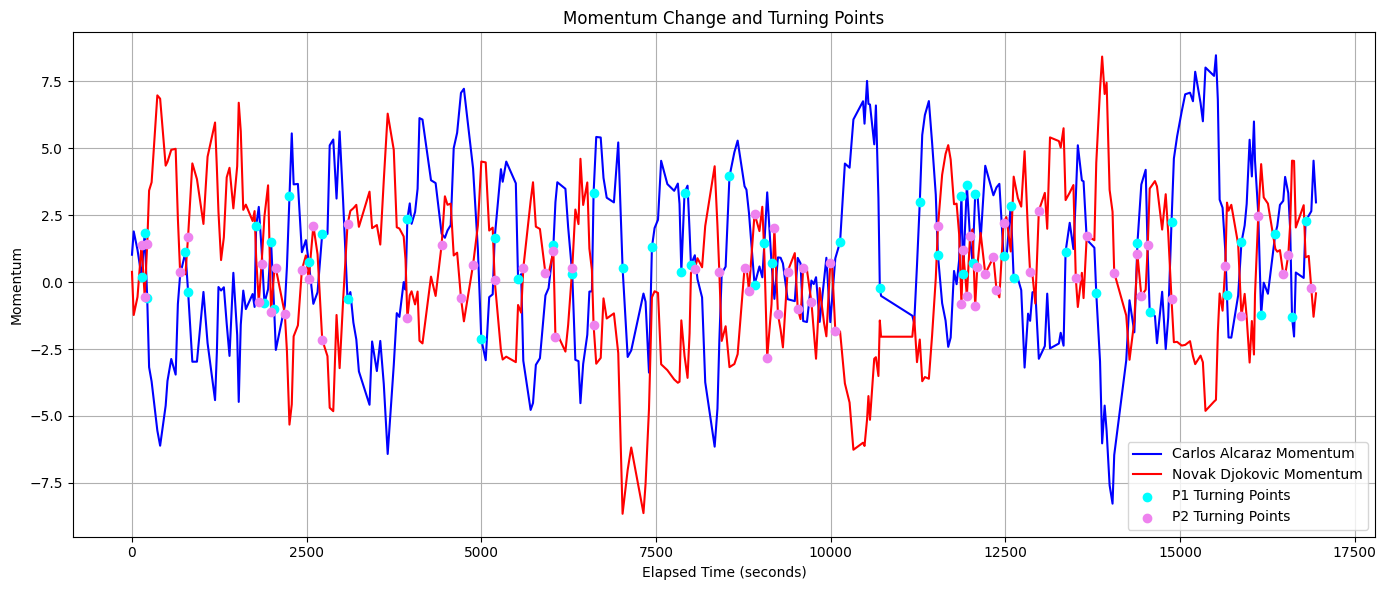

In [83]:
import matplotlib.pyplot as plt
def cumsum_detection(series):
    """
    CUMSUM检测算法实现，用于检测序列中的转折点。
    :param series: 一维数据序列 (Pandas Series)
    :return: 转折点的索引列表
    """
    # 计算差分序列
    diff_series = series.diff().fillna(0)  # 用0填充NaN值
    
    # 计算累积和
    cumsum_series = diff_series.cumsum()
    
    # 识别转折点：当累积和重新穿过零点时，认为是一个转折点
    turning_points = []
    for i in range(1, len(cumsum_series)):
        # 如果累积和的符号与前一个不同，则认为是转折点
        if cumsum_series[i] * cumsum_series[i-1] < 0:
            turning_points.append(i)
    
    return turning_points


# 将 elapsed_time 转换为可比较的数值（秒）
elapsed_seconds = match_momentum_data['elapsed_time'].apply(lambda x: sum(int(a) * 60**index for index, a in enumerate(reversed(x.split(":")))))
# 应用CUMSUM检测算法来识别两位球员势头的转折点
p1_turning_points = cumsum_detection(match_momentum_data['p1_momentum_combined'])
p2_turning_points = cumsum_detection(match_momentum_data['p2_momentum_combined'])

# 绘制势头变化和转折点
plt.figure(figsize=(14, 6))
plt.plot(elapsed_seconds, match_momentum_data['p1_momentum_combined'], label=match_momentum_data['player1'].iloc[0] + " Momentum", color='blue')
plt.plot(elapsed_seconds, match_momentum_data['p2_momentum_combined'], label=match_momentum_data['player2'].iloc[0] + " Momentum", color='red')

# 标记转折点
plt.scatter(elapsed_seconds.iloc[p1_turning_points], match_momentum_data['p1_momentum_combined'].iloc[p1_turning_points], color='cyan', label='P1 Turning Points', zorder=5)
plt.scatter(elapsed_seconds.iloc[p2_turning_points], match_momentum_data['p2_momentum_combined'].iloc[p2_turning_points], color='violet', label='P2 Turning Points', zorder=5)

plt.legend()
plt.title('Momentum Change and Turning Points')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('Momentum')
plt.grid(True)
plt.tight_layout()
plt.show()



In [20]:
# 旨在标记哪些位置是转折点，在相应行数那里打一个1标记
def mark_indices_in_list(length, indices):
    """
    根据指定的索引列表，在长度为length的列表中标记索引位置。
    
    :param length: 列表的长度
    :param indices: 需要标记为1的索引值列表
    :return: 标记后的列表，其中指定索引位置为1，其他位置为0
    """
    # 初始化列表，长度为length，所有值为0
    marked_list = [0] * length
    
    # 在指定索引位置标记为1
    for index in indices:
        if index < length:  # 确保索引在列表长度范围内
            marked_list[index] = 1
            
    return marked_list
list_length=len(match_momentum_data)
p1_turning_points = mark_indices_in_list(list_length, p1_turning_points)
p2_turning_points = mark_indices_in_list(list_length, p2_turning_points)

In [21]:
match_momentum_data['p1_turning_points']=p1_turning_points

match_momentum_data['p2_turning_points']=p2_turning_points

In [23]:
match_momentum_data[['match_id', 'player1', 'player2','elapsed_time', 'p1_momentum_combined', 'p2_momentum_combined', 'p1_turning_points', 'p2_turning_points']].to_csv('momentum_turning_pt.csv',index=None)

In [82]:
from scipy.stats import norm
import numpy as np
def runs_test(sequence):
    """
    游程检验，判断序列随机性。
    :param sequence: 输入的序列 (list or np.array)
    :return: Z统计量和p值
    """
    # 将序列分为两类
    median_value = np.median(sequence)
    binary_sequence = [1 if x > median_value else 0 for x in sequence]
    
    # 计算游程数量
    runs = 1  # 至少有一个游程
    for i in range(1, len(binary_sequence)):
        if binary_sequence[i] != binary_sequence[i-1]:
            runs += 1
    
    # 计算期望的游程数量和标准差
    n1 = binary_sequence.count(1)
    n2 = binary_sequence.count(0)
    expected_runs = 2 * n1 * n2 / (n1 + n2) + 1
    variance = (expected_runs - 1) * (expected_runs - 2) / (n1 + n2 - 1)
    
    # 计算Z统计量
    Z = (runs - expected_runs) / np.sqrt(variance)
    
    # 计算p值
    p_value = 2 * (1 - norm.cdf(abs(Z)))  # 双尾检验
    
    return Z, p_value

runs_test(match_momentum_data['p1_momentum_combined'])
runs_test(match_momentum_data['p2_momentum_combined'])
runs_test( p1_turning_points)
runs_test( p2_turning_points)

print(runs_test(match_momentum_data['p1_momentum_combined']))
print(runs_test(match_momentum_data['p2_momentum_combined']))
print(runs_test( p1_turning_points))
print(runs_test( p1_turning_points))


(-11.946380277367568, 0.0)
(-11.069581724900225, 0.0)
(-0.37797559927822955, 0.7054487206390712)
(-0.37797559927822955, 0.7054487206390712)
